In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.special import inv_boxcox
import scipy.stats as stats

C:\Users\Jocelyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Jocelyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('store.csv')

In [3]:
df.head()

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor
0,1/1/12,15.50,46,1070,0,BURGER,2012,New Year,1,0,24.8,0
1,1/1/12,12.73,22,2051,2,BURGER,2012,New Year,1,0,24.8,0
2,1/1/12,12.73,22,2051,2,COKE,2012,New Year,1,0,24.8,0
3,1/1/12,12.75,18,2052,2,BURGER,2012,New Year,1,0,24.8,0
4,1/1/12,12.75,18,2052,2,LEMONADE,2012,New Year,1,0,24.8,0


In [4]:
df.shape

(10840, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10840 non-null  object 
 1   price            10840 non-null  float64
 2   qty              10840 non-null  int64  
 3   sell_id          10840 non-null  int64  
 4   sell_cat         10840 non-null  int64  
 5   item             10840 non-null  object 
 6   year             10840 non-null  int64  
 7   holiday          840 non-null    object 
 8   is_weekend       10840 non-null  int64  
 9   is_schoolbreak   10840 non-null  int64  
 10  avg_temperature  10840 non-null  float64
 11  is_outdoor       10840 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1016.4+ KB


In [6]:
df['item'] = df['item'].astype('category')
df['holiday'] = df['holiday'].astype('category')

In [7]:
### Data Preprocessing

In [8]:
## CHECKING FOR NULLS

In [9]:
df.isnull().sum()

date                   0
price                  0
qty                    0
sell_id                0
sell_cat               0
item                   0
year                   0
holiday            10000
is_weekend             0
is_schoolbreak         0
avg_temperature        0
is_outdoor             0
dtype: int64

In [10]:
df['holiday'].value_counts()

Luner New Year          224
National Day            168
Dragon Boat Festivel     96
Labor Day                96
Qing Ming Festival       96
New Year                 80
Mid-Autumn Day           56
WWII Celebration         24
Name: holiday, dtype: int64

In [11]:
df[df['holiday'].isnull()]

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor
24,1/4/12,15.50,88,1070,0,BURGER,2012,NaN,0,0,32.0,1
25,1/4/12,12.73,26,2051,2,BURGER,2012,NaN,0,0,32.0,1
26,1/4/12,12.73,26,2051,2,COKE,2012,NaN,0,0,32.0,1
27,1/4/12,12.75,24,2052,2,BURGER,2012,NaN,0,0,32.0,1
28,1/4/12,12.75,24,2052,2,LEMONADE,2012,NaN,0,0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,9/10/15,11.50,18,2052,2,BURGER,2015,NaN,0,0,73.4,1
10836,9/10/15,11.50,18,2052,2,LEMONADE,2015,NaN,0,0,73.4,1
10837,9/10/15,11.26,50,2053,2,BURGER,2015,NaN,0,0,73.4,1
10838,9/10/15,11.26,50,2053,2,COKE,2015,NaN,0,0,73.4,1


In [12]:
df['date'] = pd.to_datetime(df["date"],format="%m/%d/%y")

In [13]:
# Replace NA
df['holiday'] = np.where(df['holiday'].isnull(),'No holiday',df['holiday'])


In [14]:
# binary features
df['is_holiday'] = np.where(df['holiday'] == "No holiday",0,1)


In [15]:
# label encoder
encoder = LabelEncoder()
df['holiday']  = encoder.fit_transform(df['holiday'] )

In [16]:
##DUPLICATES
dupli = df[df['date'] == '2013-03-01']
dupli

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor,is_holiday
3392,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,39.2,1,0
3393,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,32.0,1,0
3394,2013-03-01,15.50,90,2051,2,BURGER,2013,6,0,0,39.2,1,0
3395,2013-03-01,15.50,90,2051,2,BURGER,2013,6,0,0,32.0,1,0
3396,2013-03-01,15.50,90,2051,2,COKE,2013,6,0,0,39.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,2013-03-01,13.41,40,2053,2,BURGER,2013,6,0,0,32.0,1,0
3452,2013-03-01,13.41,40,2053,2,COKE,2013,6,0,0,39.2,1,0
3453,2013-03-01,13.41,40,2053,2,COKE,2013,6,0,0,32.0,1,0
3454,2013-03-01,13.41,40,2053,2,COFFEE,2013,6,0,0,39.2,1,0


In [17]:
dupli[['sell_id','item']].value_counts()

sell_id  item    
1070     BURGER      8
2051     BURGER      8
         COKE        8
2052     BURGER      8
         LEMONADE    8
2053     BURGER      8
         COFFEE      8
         COKE        8
dtype: int64

In [18]:
dupli[['sell_id','item','qty','avg_temperature','price']].value_counts().to_frame()

0
sell_id item     qty avg_temperature price   
2052    BURGER   40  32.0            13.41  2
                     39.2            13.41  2
2053    COKE     40  32.0            13.41  2
        COFFEE   40  39.2            13.41  2
                     32.0            13.41  2
        BURGER   40  39.2            13.41  2
                     32.0            13.41  2
2052    LEMONADE 40  39.2            13.41  2
                     32.0            13.41  2
2053    COKE     40  39.2            13.41  2
1070    BURGER   90  32.0            15.50  2
                     39.2            15.50  2
2051    BURGER   88  32.0            15.50  1
2053    COFFEE   24  39.2            13.13  1
2051    BURGER   16  39.2            12.64  1
2053    BURGER   24  32.0            13.13  1
                     39.2            13.13  1
                 26  32.0            13.13  1
                     39.2            13.13  1
2051    BURGER   16  32.0            12.64  1
2053    COFFEE   24  32.0            13.13  1
                 26  32.0            13.13  1
2051    BURGER   88  39.2            15.50  1
2053    COFFEE   26  39.2            13.13  1
1070    BURGER   24  39.2            12.64  1
2053    COKE     24  32.0            13.13  1
                     39.2            13.13  1
                 26  32.0            13.13  1
                     39.2            13.13  1
1070    BURGER   24  32.0            12.64  1
2051    BURGER   22  32.0            12.64  1
2052    LEMONADE 30  39.2            13.13  1
                     32.0            13.13  1
                 26  39.2            13.13  1
2051    BURGER   90  32.0            15.50  1
                     39.2            15.50  1
        COKE     16  32.0            12.64  1
                     39.2            12.64  1
                 22  32.0            12.64  1
                     39.2            12.64  1
                 88  32.0            15.50  1
                     39.2            15.50  1
                 90  32.0            15.50  1
                     39.2            15.50  1
2052    BURGER   26  32.0            13.13  1
                     39.2            13.13  1
                 30  32.0            13.13  1
                     39.2            13.13  1
1070    BURGER   18  39.2            12.64  1
2051    BURGER   22  39.2            12.64  1
2052    LEMONADE 26  32.0            13.13  1
1070    BURGER   18  32.0            12.64  1

In [19]:
dupli_1 = df[df['date'] == '2013-03-02']
dupli_1

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor,is_holiday
3456,2013-03-02,15.50,58,1070,0,BURGER,2013,6,1,0,35.6,1,0
3457,2013-03-02,13.13,18,2051,2,BURGER,2013,6,1,0,35.6,1,0
3458,2013-03-02,13.13,18,2051,2,COKE,2013,6,1,0,35.6,1,0
3459,2013-03-02,12.64,20,2052,2,BURGER,2013,6,1,0,35.6,1,0
3460,2013-03-02,12.64,20,2052,2,LEMONADE,2013,6,1,0,35.6,1,0
3461,2013-03-02,13.41,26,2053,2,BURGER,2013,6,1,0,35.6,1,0
3462,2013-03-02,13.41,26,2053,2,COKE,2013,6,1,0,35.6,1,0
3463,2013-03-02,13.41,26,2053,2,COFFEE,2013,6,1,0,35.6,1,0


In [20]:
dupli_2 = df[df['date'] == '2013-02-28']
dupli_2

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor,is_holiday
3384,2013-02-28,15.50,84,1070,0,BURGER,2013,6,0,0,35.6,1,0
3385,2013-02-28,13.13,28,2051,2,BURGER,2013,6,0,0,35.6,1,0
3386,2013-02-28,13.13,28,2051,2,COKE,2013,6,0,0,35.6,1,0
3387,2013-02-28,12.64,22,2052,2,BURGER,2013,6,0,0,35.6,1,0
3388,2013-02-28,12.64,22,2052,2,LEMONADE,2013,6,0,0,35.6,1,0
3389,2013-02-28,13.41,44,2053,2,BURGER,2013,6,0,0,35.6,1,0
3390,2013-02-28,13.41,44,2053,2,COKE,2013,6,0,0,35.6,1,0
3391,2013-02-28,13.41,44,2053,2,COFFEE,2013,6,0,0,35.6,1,0


In [21]:
days = df[(df['date'] == '2013-02-28') | (df['date'] == '2013-03-02')]
days.groupby(['sell_id','item'])['qty','price'].mean().dropna()

<ipython-input-21-7dc0ce878687>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  days.groupby(['sell_id','item'])['qty','price'].mean().dropna()


qty  price
sell_id item                 
1070    BURGER    71.0  15.50
2051    BURGER    23.0  13.13
        COKE      23.0  13.13
2052    BURGER    21.0  12.64
        LEMONADE  21.0  12.64
2053    BURGER    35.0  13.41
        COFFEE    35.0  13.41
        COKE      35.0  13.41

In [22]:
dup_1070 = dupli[dupli['sell_id'] == 1070]
dup_1070

,date,price,qty,sell_id,sell_cat,item,year,holiday,is_weekend,is_schoolbreak,avg_temperature,is_outdoor,is_holiday
3392,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,39.2,1,0
3393,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,32.0,1,0
3408,2013-03-01,12.64,24,1070,0,BURGER,2013,6,0,0,39.2,1,0
3409,2013-03-01,12.64,24,1070,0,BURGER,2013,6,0,0,32.0,1,0
3424,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,39.2,1,0
3425,2013-03-01,15.50,90,1070,0,BURGER,2013,6,0,0,32.0,1,0
3440,2013-03-01,12.64,18,1070,0,BURGER,2013,6,0,0,39.2,1,0
3441,2013-03-01,12.64,18,1070,0,BURGER,2013,6,0,0,32.0,1,0


In [23]:
def get_real_value(dataframe,qty,price,avg_tmp=32):
    return dataframe[(dataframe['qty'] == qty) & (dataframe['price'] == price) & (dataframe['avg_temperature'] == avg_tmp) ].drop_duplicates()
dup_1070 = get_real_value(dup_1070,90,15.50,32) 
dup_2051 = dupli[(dupli['sell_id'] == 2051)]
dup_2051 = get_real_value(dup_2051,22,12.64)
dup_2052 = dupli[(dupli['sell_id'] == 2052)]
dup_2052 = get_real_value(dup_2052,26,13.13)
dup_2053 = dupli[(dupli['sell_id'] == 2053)]
dup_2053 = get_real_value(dup_2053,40,13.41)

to_keep = pd.concat([dup_1070,dup_2051,dup_2052,dup_2053])
# Drop real values from duplicates df
dupli = dupli.drop(to_keep.index)
# Drop duplicates
df = df.drop(dupli.index)

In [24]:
######## eda
#2051 coke
#2052- burger
#1070-burger
#2053-lemonade

Text(0.5, 1.0, 'Quantity and Price Relation')

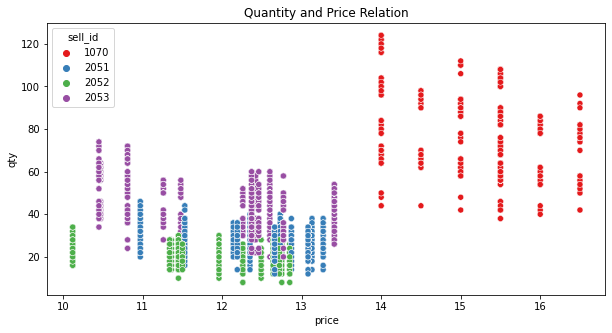

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x=df['price'],y=df['qty'],hue=df['sell_id'],palette='Set1')
plt.title('Quantity and Price Relation')

Text(0.5, 1.0, 'Price by sell id')

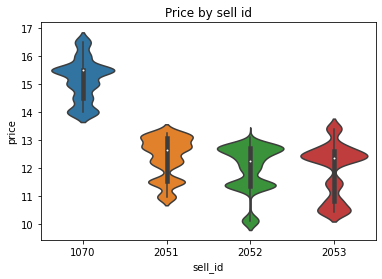

In [26]:
sns.violinplot(data=df,x='sell_id',y='price')
plt.title('Price by sell id')

Text(0.5, 1.0, 'QTY by sell id')

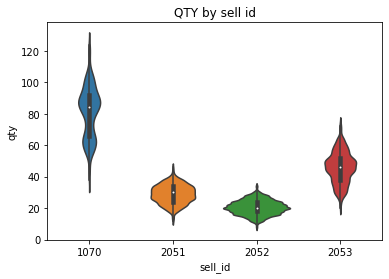

In [27]:
sns.violinplot(data=df,x='sell_id',y='qty')
plt.title('QTY by sell id')

In [28]:
##Of this 3 charts we can observe that:

#1.- The 1070 has a different set of price and quantity (more expensive and more quantity) than the combos.
#2.- 1070 has different price distribution but the others are similar.
#3.- The 1070 quantity is more spread. All products have different qty distribution.
#4.- Split by sell_id would be a good idea to optimize the prices since they have different distributions.
##
##

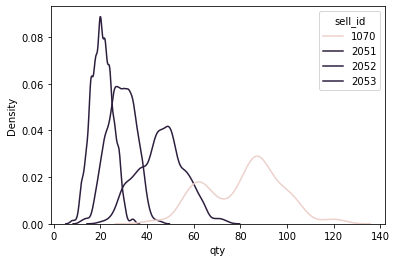

In [29]:
sns.kdeplot(data=df,x="qty",hue='sell_id',common_norm=False)


In [30]:
df.columns

Index(['date', 'price', 'qty', 'sell_id', 'sell_cat', 'item', 'year',
       'holiday', 'is_weekend', 'is_schoolbreak', 'avg_temperature',
       'is_outdoor', 'is_holiday'],
      dtype='object')

(array([5392.,    0.,    0., 2696.,    0.,    0., 1348.,    0.,    0.,
        1348.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

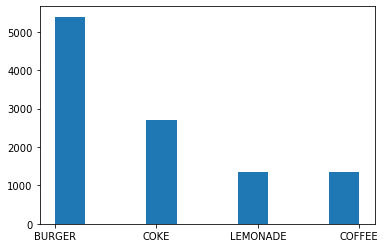

In [31]:
plt.hist(df.item)

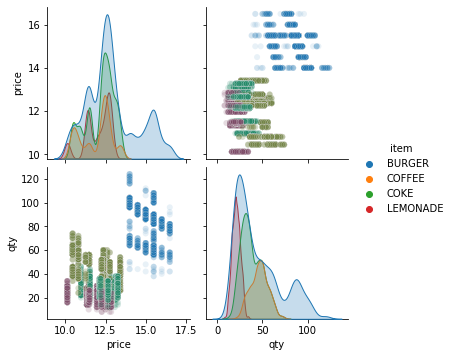

In [32]:
sns.pairplot(df[['price','qty','item']], hue = 'item', plot_kws={'alpha':0.1})

In [33]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [162]:
def split_and_boxcox(dataset,feature,sell_id):
    dataset = dataset[dataset['sell_id'] == sell_id].copy()
    params=[]
    for x in feature:
        feature_box= x+"_boxcox"
        dataset[feature_box],params_x = stats.boxcox(dataset[x]) 
        params.append(params_x)
    return dataset,params

Optimal lambda:  1.1313767316458048


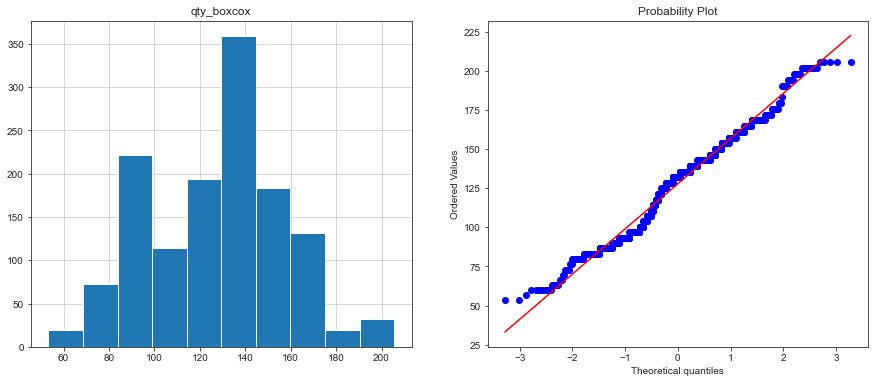

Optimal lambda:  1.8431352098916052


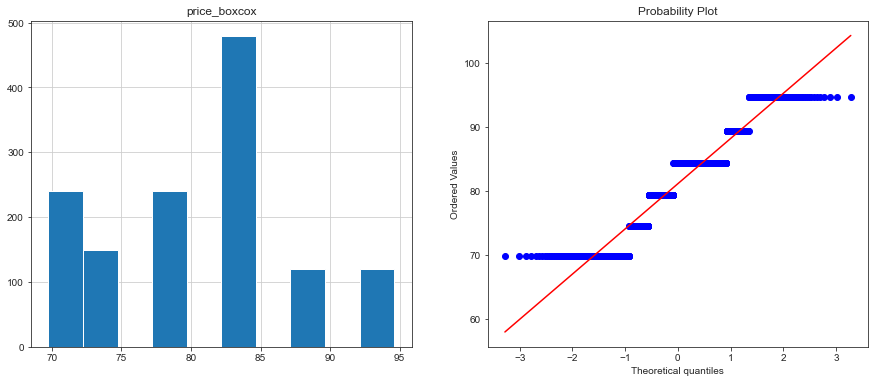

Optimal lambda:  1.0387871999175584


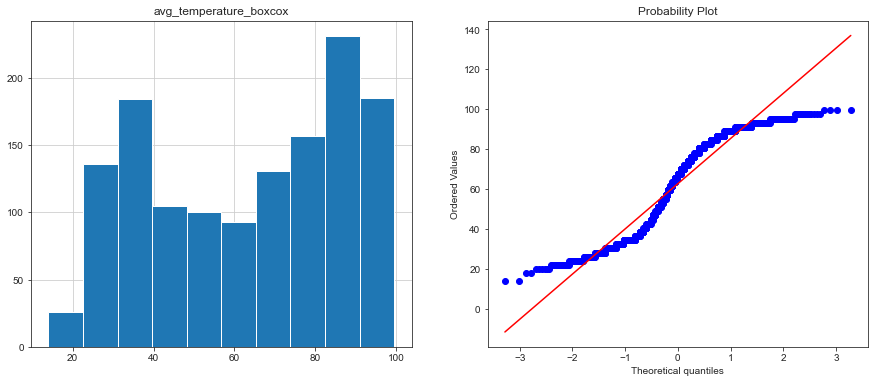

In [164]:
df_1070,param_1070 = split_and_boxcox(df,['qty','price','avg_temperature'],1070)
print('Optimal lambda: ', param_1070[0])
diagnostic_plots(df_1070, 'qty_boxcox')

print('Optimal lambda: ', param_1070[1])
diagnostic_plots(df_1070, 'price_boxcox')

print('Optimal lambda: ', param_1070[2])
diagnostic_plots(df_1070, 'avg_temperature_boxcox')

In [140]:
scaler_price = StandardScaler()
scaler_qty = StandardScaler()
scaler_avg = StandardScaler()

df_1070['qty_t'] = scaler_qty.fit_transform(df_1070[['qty_boxcox']])
df_1070['price_t'] = scaler_price.fit_transform(df_1070[['price_boxcox']])
df_1070['avg_temperature_t'] = scaler_avg.fit_transform(df_1070[['avg_temperature_boxcox']])

In [141]:
encoder = LabelEncoder()
df_1070['year']  = encoder.fit_transform(df_1070['year'] )

                            OLS Regression Results                            
Dep. Variable:                  qty_t   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3266.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 37.706
No. Observations:                1348   AIC:                            -59.41
Df Residuals:                    1340   BIC:                            -17.76
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4570      0.02

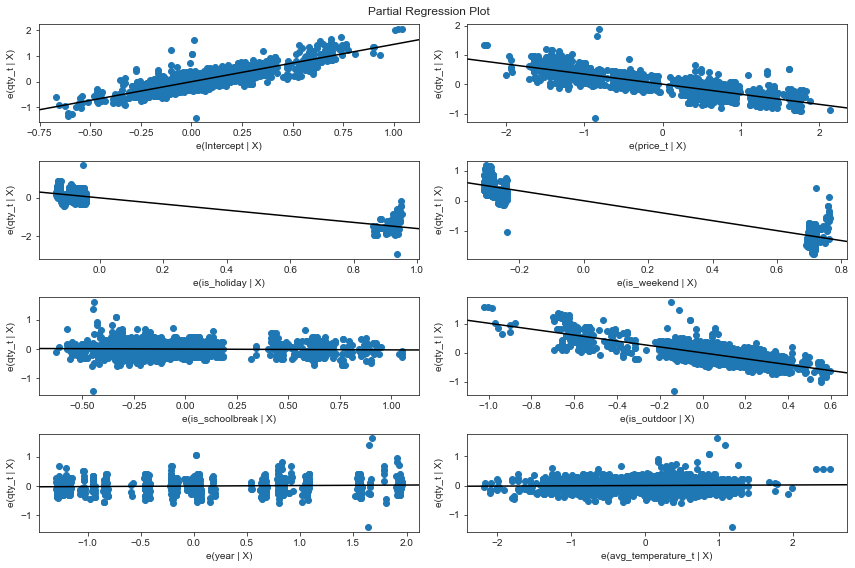

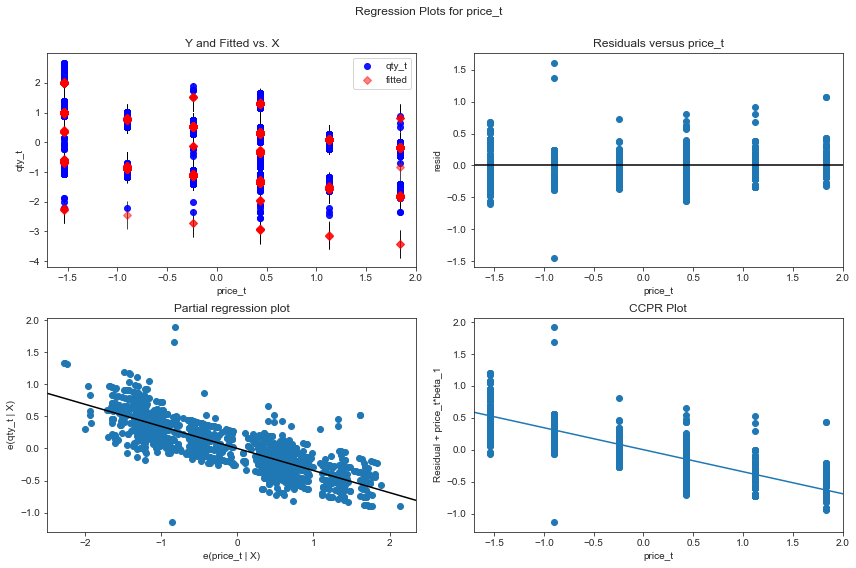

In [142]:
model = ols("qty_t ~ price_t+is_holiday+is_weekend+is_schoolbreak+is_outdoor+year+avg_temperature_t", data=df_1070).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'price_t', fig=fig)

                            OLS Regression Results                            
Dep. Variable:                  qty_t   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     4569.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:39:21   Log-Likelihood:                 36.247
No. Observations:                1348   AIC:                            -60.49
Df Residuals:                    1342   BIC:                            -29.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4394      0.020     73.484      0.0

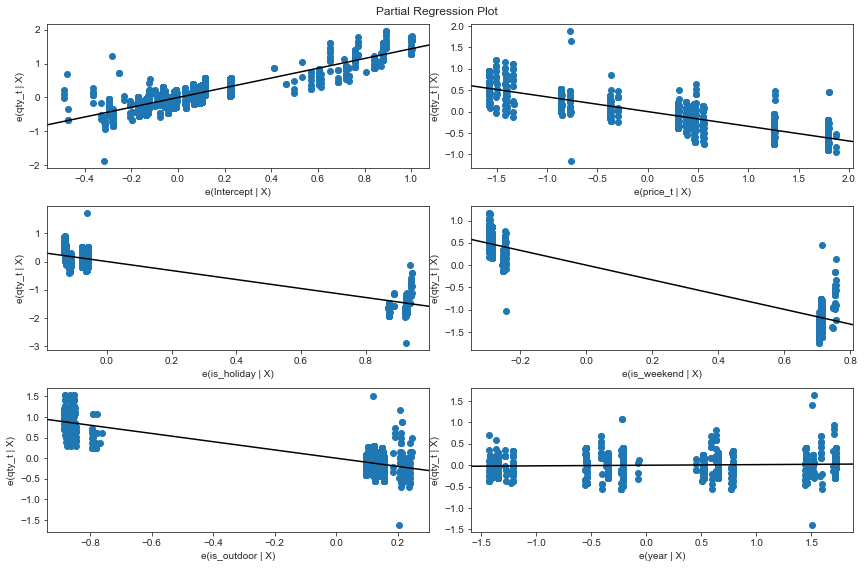

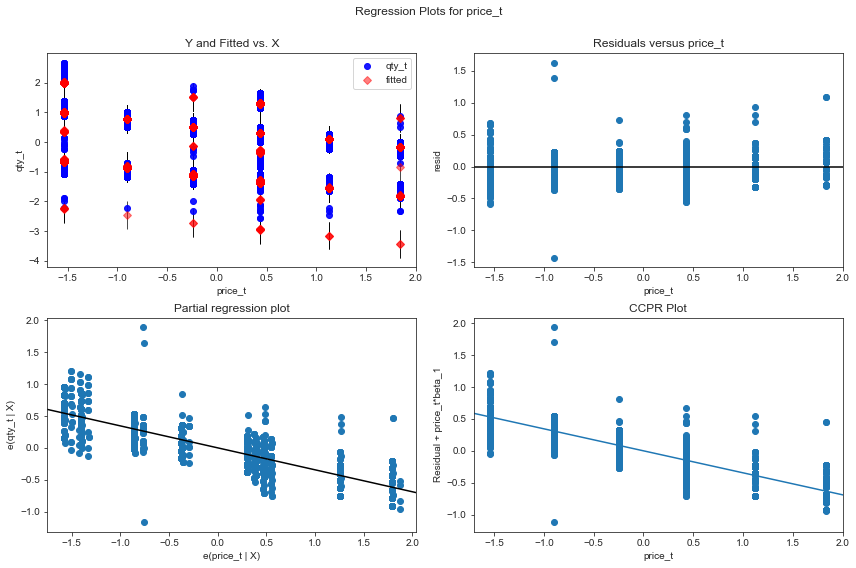

In [143]:
model = ols("qty_t ~ price_t+is_holiday+is_weekend+is_outdoor+year", data=df_1070).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'price_t', fig=fig)

In [216]:
def find_optimal_price(data, model):
    start_price = data['price'].min()- 3          
    end_price = data['price'].min()+6
    test = pd.DataFrame(columns = ["price","qty"])
    test['price'] = np.arange(start_price, end_price,0.1)
    test['is_weekend'] = 1
    test['is_holiday'] = 0
    test['is_outdoor'] = 0
    test['year'] = 3
    scaler = StandardScaler()
    test['price_boxcox'] = stats.boxcox(test['price'],lmbda = 1.8431352098916052) 
    test['price_t'] = scaler_price.transform(test[['price_boxcox']])
    model1 = ols("qty_t ~ price_t+is_holiday+is_weekend+is_outdoor+year",data).fit()
    test['qty_t'] = model.predict(test[['is_weekend','is_outdoor','is_holiday','price_t','year']])
    test['qty'] = scaler_qty.inverse_transform(test[['qty_t']])
    test['qty'] = inv_boxcox(test['qty'], 1.1313767316458048)
    test['revenue'] = test['qty'] * test['price']
    max_index = test['revenue'].idxmax()
    df_max = test.iloc[[max_index]]
    optimal_price = df_max['price'].values[0].round(2)
    sns.set_style("ticks")
    sns.lineplot(x=test['price'], y=test['qty'], linewidth=2, color='#d7191c',label="price-qty")
    sns.lineplot(x=test['price'], y=test['revenue'],linewidth=2, color='#2c7bb6' ,label="price-revenue")
    sns.scatterplot(x=df_max['price'], y=df_max['revenue'], color='#fdae61', s=150, zorder=3)
    plt.text(df_max['price'], df_max['revenue'], optimal_price, ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.xlabel('Price', fontsize=12, fontweight='bold')
    plt.ylabel('Quantity', fontsize=12, fontweight='bold')
    plt.title('Optimal price for revenue', fontsize=14, fontweight='bold')
    plt.tight_layout()
    sns.despine(trim=True)
    plt.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, pad=10)
    plt.show()
    print(df_max[['price','qty','revenue']])
    
    

In [217]:
df1,param_2051 = split_and_boxcox(df,['qty','price','avg_temperature'],2051)
df2,param_2052 = split_and_boxcox(df,['qty','price','avg_temperature'],2052)
df3,param_2053 = split_and_boxcox(df,['qty','price','avg_temperature'],2053)


In [218]:
burger_2051 = df1[(df1['item'] == 'BURGER') & (df['sell_id'] == 2051)]
burger_2052 = df2[(df2['item'] == 'BURGER') & (df2['sell_id'] == 2052)]
coke_2051 = df1[(df1['item'] == 'COKE') & (df1['sell_id'] == 2051)] 
coke_2053 = df3[(df3['item'] == 'COKE') & (df3['sell_id'] == 2053)]
coffee_2053 = df3[(df3['item'] == 'COFFEE') & (df3['sell_id'] == 2053)]
lemonade_2052 = df2[(df2['item'] == 'LEMONADE') & (df2['sell_id'] == 2052)]

In [219]:
optimal_price = {}

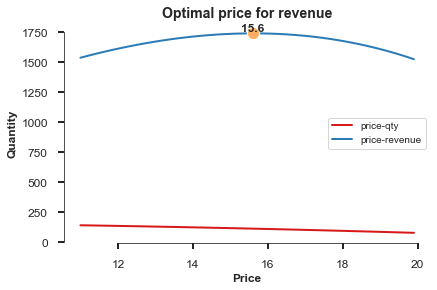

    price         qty      revenue
46   15.6  111.358753  1737.196551


In [220]:

optimal_price['burger_1070'] = find_optimal_price(df_1070, model1)

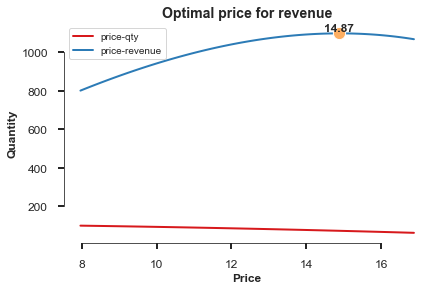

    price        qty      revenue
69  14.87  73.787748  1097.223815


In [187]:
optimal_price['burger_2051'] = find_optimal_price(burger_2051, model1)

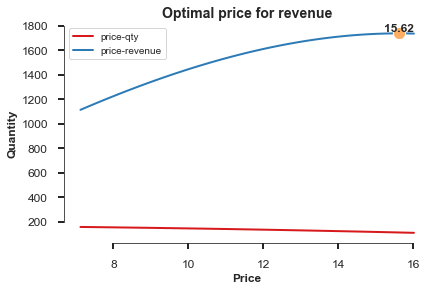

    price         qty      revenue
85  15.62  111.216485  1737.201497


In [225]:
optimal_price['burger_2052'] = find_optimal_price(burger_2052, model1)

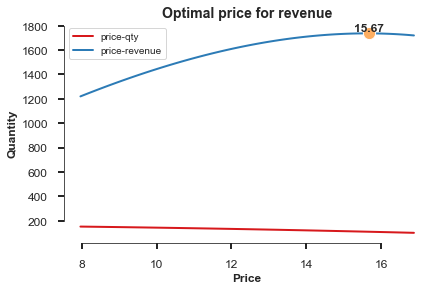

    price         qty      revenue
77  15.67  110.860037  1737.176786


In [221]:
optimal_price['coke_2051'] = find_optimal_price(coke_2051, model1)

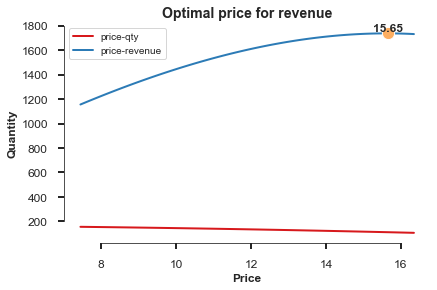

    price        qty      revenue
82  15.65  111.00275  1737.193034


In [222]:
optimal_price['coke_2053'] = find_optimal_price(coke_2053, model1)

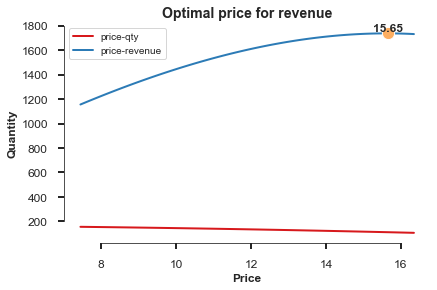

    price        qty      revenue
82  15.65  111.00275  1737.193034


In [224]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_2053, model1)

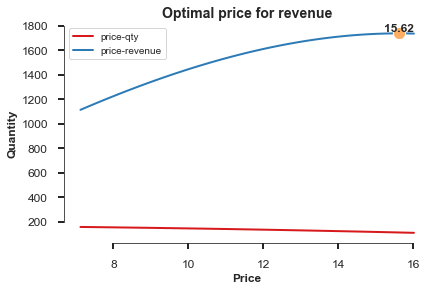

    price         qty      revenue
85  15.62  111.216485  1737.201497


In [223]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_2052, model1)

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [48]:
X=df_1070[['qty_t','is_holiday','is_weekend','is_outdoor','year']]
y=df_1070["price_t"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [50]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.040565
0:	learn: 0.9783597	total: 301ms	remaining: 5m
1:	learn: 0.9648698	total: 303ms	remaining: 2m 31s
2:	learn: 0.9436098	total: 305ms	remaining: 1m 41s
3:	learn: 0.9243152	total: 308ms	remaining: 1m 16s
4:	learn: 0.9079471	total: 310ms	remaining: 1m 1s
5:	learn: 0.9000600	total: 312ms	remaining: 51.6s
6:	learn: 0.8852790	total: 314ms	remaining: 44.5s
7:	learn: 0.8678118	total: 316ms	remaining: 39.2s
8:	learn: 0.8492037	total: 318ms	remaining: 35.1s
9:	learn: 0.8340609	total: 320ms	remaining: 31.7s
10:	learn: 0.8183023	total: 323ms	remaining: 29s
11:	learn: 0.8034115	total: 326ms	remaining: 26.8s
12:	learn: 0.7885413	total: 328ms	remaining: 24.9s
13:	learn: 0.7730077	total: 330ms	remaining: 23.3s
14:	learn: 0.7592993	total: 333ms	remaining: 21.9s
15:	learn: 0.7469851	total: 335ms	remaining: 20.6s
16:	learn: 0.7348150	total: 338ms	remaining: 19.5s
17:	learn: 0.7219765	total: 340ms	remaining: 18.6s
18:	learn: 0.7107523	total: 342ms	remaining: 17.7s
19:	learn: 0.

In [51]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [52]:
for i in models:
     print(i,"Algorithm succeed rate :",ML("survived",i))

Ridge() Algorithm succeed rate : 0.673360591583236
Lasso() Algorithm succeed rate : 0.0
ElasticNet() Algorithm succeed rate : 0.0
KNeighborsRegressor() Algorithm succeed rate : 0.8873159569785009
AdaBoostRegressor() Algorithm succeed rate : 0.6314673539758331
SVR() Algorithm succeed rate : 0.771249654637341
MLPRegressor() Algorithm succeed rate : 0.8126799591649483
DecisionTreeRegressor() Algorithm succeed rate : 0.9289064940735767
RandomForestRegressor() Algorithm succeed rate : 0.9240193949754038
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
 

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
  
pred = xgb.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))